In [1]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../../msd_full.csv')

df['duration'] = df['duration'] * 1000

df = df[df['year'] != 0]
df = df[df['popularity'] != 0]
df = df[df['tempo'] != 0]

df = df.dropna()

In [3]:
X = df[['year', 'duration', 'key', 'loudness', 'mode', 'tempo', 'signature']]
y = df['popularity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [4]:
gbr_model = GradientBoostingRegressor(random_state=42)

gbr_model.fit(X_train_scaled, y_train)

y_pred_gbr = gbr_model.predict(X_test_scaled)

mse_gbr = mean_squared_error(y_test, y_pred_gbr)
r2_gbr = r2_score(y_test, y_pred_gbr)

print(f'Gradient Boosting Mean Squared Error: {mse_gbr}')
print(f'Gradient Boosting R^2 Score: {r2_gbr}')

Gradient Boosting Mean Squared Error: 0.023579864040516717
Gradient Boosting R^2 Score: 0.04585129940726762


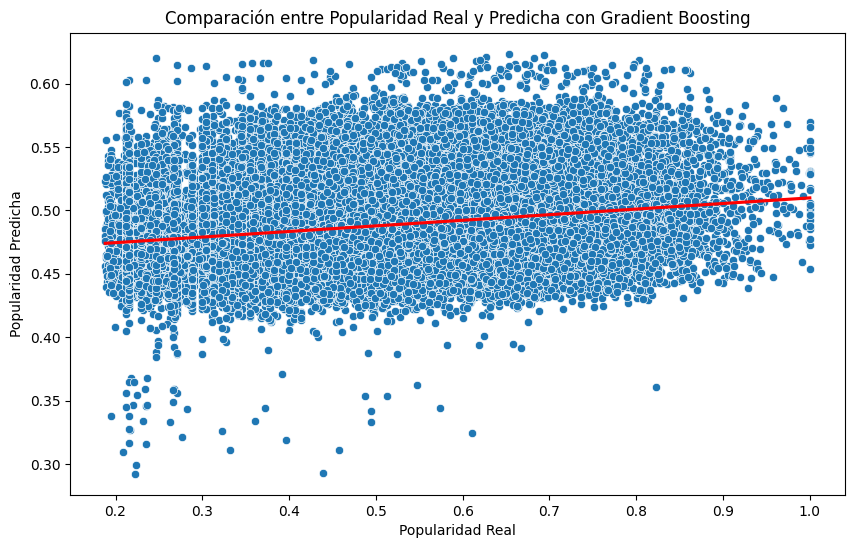

In [6]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_gbr)
sns.regplot(x=y_test, y=y_pred_gbr, scatter=False, color='red', label='Regresión')
plt.xlabel('Popularidad Real')
plt.ylabel('Popularidad Predicha')
plt.title('Comparación entre Popularidad Real y Predicha con Gradient Boosting')
plt.show()